# CO₂ Exchange Simulation 

## Background

As a simple example of a global geochemical simulation, consider the
exchange of carbon dioxide between the ocean and the atmosphere.

The atmosphere contains 5.6 × 10¹⁶ moles of carbon dioxide, assumed to be in
equilibrium with the ocean. The oceanic reservoir is considered very large and
therefore does not change significantly over time. According to Broecker and Peng
(1982), the annual exchange of carbon dioxide between the ocean and atmosphere
is approximately 6.5 × 10¹⁵ moles. The rate of transfer from the atmosphere to
the ocean is proportional to the atmospheric concentration, while the return flow
is taken as constant.

This simulation examines the response of atmospheric \( pCO_2 \) to an assumed sudden
injection of fossil fuel carbon. Specifically, we model the recovery of \( pCO_2 \)
from an initial perturbation of \( pCO_2 = 5 \) times the preindustrial level.

To numerically solve this system, we use:
- **Explicit (Forward) Euler Method**: Demonstrates instability for large step sizes.
- **Implicit (Backward) Euler Method**: More stable for stiff equations.
- **SciPy's `solve_ivp` (RK45)**: Provides a reference solution with adaptive step sizes.


## Background to numerical solutions

The model is based on the differential equation:

$$ \frac{dpCO_2}{dt} = \frac{1 - pCO_2}{\tau} $$

where \( \tau \) is the residence time of CO₂ in the atmosphere.

---

## Numerical Methods

### Explicit Euler Method

This method approximates the solution by:

$$ y_{n+1} = y_n + h f(t_n, y_n) $$

where \( h \) is the time step.

It is prone to instability for large step sizes.

---

### Implicit Euler Method

This method uses:

$$ y_{n+1} = \frac{y_n}{1 + h / \tau} $$

This approach is more stable for stiff systems, as it ensures numerical stability even for larger time steps.

---

### Reference Solution using `solve_ivp`

SciPy's `solve_ivp` function uses an adaptive step-size Runge-Kutta (RK45) method, which provides a more accurate reference solution.

---

## Results & Comparison

We compare the solutions from different methods to illustrate numerical stability.

- The **Explicit Euler method** is unstable for larger step sizes.
- The **Implicit Euler method** remains stable.
- The **SciPy RK45 solution** serves as a reference.

Below is a visualization of these different methods.

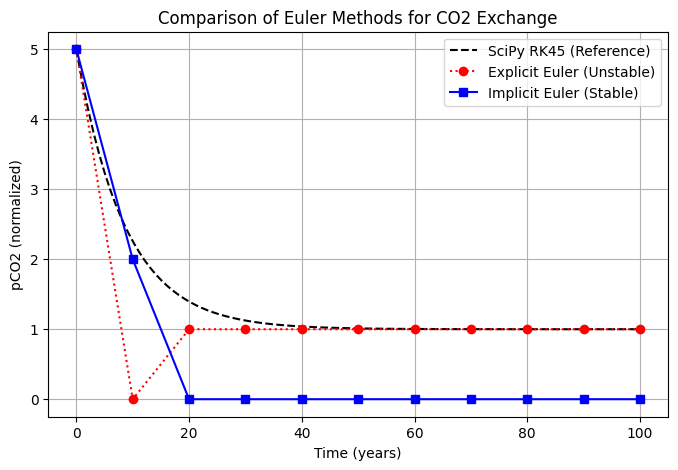

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Define the CO2 exchange model
def co2_exchange(t, pco2, residence_time):
    return (1 - pco2) / residence_time

# Parameters
residence_time = 8.64  # years
pco2_initial = 5  # Initial perturbation (e.g., from fossil fuel burning)
time_span = (0, 100)  # Simulation from 0 to 100 years

# Explicit Euler Method
def explicit_euler(f, t0, y0, h, t_end):

    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        y_values[i] = y_values[i-1] + h * f(t_values[i-1], y_values[i-1], residence_time)
    
    return t_values, y_values

# Implicit Euler Method
def implicit_euler(f, t0, y0, h, t_end):

    t_values = np.arange(t0, t_end + h, h)
    y_values = np.zeros_like(t_values)
    y_values[0] = y0
    
    for i in range(1, len(t_values)):
        # Rearranging the backward Euler formula for this specific case
        y_values[i] = y_values[i-1] / (1 + h / residence_time)
    
    return t_values, y_values

# Reference Solution using SciPy's solve_ivp
sol = solve_ivp(co2_exchange, time_span, [pco2_initial], args=(residence_time,), dense_output=True)
t_scipy = np.linspace(time_span[0], time_span[1], 100)
pco2_scipy = sol.sol(t_scipy)[0]

# Simulate using both Euler methods
h = 10  # Step size in years
t_explicit, pco2_explicit = explicit_euler(co2_exchange, 0, pco2_initial, h, 100)
t_implicit, pco2_implicit = implicit_euler(co2_exchange, 0, pco2_initial, h, 100)

# Plot results
plt.figure(figsize=(8, 5))
plt.plot(t_scipy, pco2_scipy, label='SciPy RK45 (Reference)', linestyle='dashed', color='black')
plt.plot(t_explicit, pco2_explicit, label='Explicit Euler (Unstable)', marker='o', linestyle='dotted', color='red')
plt.plot(t_implicit, pco2_implicit, label='Implicit Euler (Stable)', marker='s', linestyle='solid', color='blue')
plt.xlabel('Time (years)')
plt.ylabel('pCO2 (normalized)')
plt.title('Comparison of Euler Methods for CO2 Exchange')
plt.legend()
plt.grid()
plt.show()